What all we need to do in this project to demonstrate is as a successful mini-project
PHASE ONE:
1. Collecting data --> (Collected data from multiple sources and identified learning patterns) - done 
2. Data Preprocessing --> (Check the data for any inconsistencies and NULL values, Remove them for helping our ML model to train perfectly) -done
3. Exploratory Data Analysis --> (We will play around with data and show some analytics in pictures using matplotlib library) -done
PHASE TWO:
1. Identification of suitable ML Models --> (By analying the collected data, we know We can achieve our desired outputs using Decision Tree, Random Forest and XGBoost Models) -done 
2. Training the ML Models --> (We train the suitable ML Models with the collected data and test it) -done
3. Selecting the suitable model for Project --> (By considering the metrics like accuracy, usablility and robustness) -done 
PHASE THREE:
1. Model Transformation --> (We change the trained ML model into suitable format for interface) -done
2. Interface Desigining --> (We design the interface preferring atmost usability and pleasing look) - done
3. Functional Interface --> (We connect the interface to our ML model so that our model sends recommenditions based on inputs from interface) -done
4. Deployment -->(We deploy the fully functional Interface+Model into a web-hosting service for continuous usage) - pending

In [2]:
#Importing all the required Libraries for handling data..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Preprocessing

In [17]:
df3 = pd.read_csv("student_learning_data_with_nulls3.csv")

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student ID                3993 non-null   float64
 1   Subject                   3991 non-null   object 
 2   Previous Score            3985 non-null   float64
 3   Time Left                 3989 non-null   float64
 4   Subject Importance        3993 non-null   float64
 5   Preferred Learning Style  3999 non-null   object 
dtypes: float64(4), object(2)
memory usage: 187.6+ KB


In [19]:
df3.head()

,Student ID,Subject,Previous Score,Time Left,Subject Importance,Preferred Learning Style
0,1.0,Economics,70.0,26.0,1.0,Lectures
1,1.0,History,71.0,31.0,5.0,Practice-Reading
2,1.0,Chemistry,84.0,28.0,5.0,Practical-Visual
3,1.0,Science,77.0,51.0,5.0,Visual-Practical
4,1.0,Science,68.0,29.0,5.0,Practice-Lectures


In [20]:
df3

,Student ID,Subject,Previous Score,Time Left,Subject Importance,Preferred Learning Style
0,1.0,Economics,70.0,26.0,1.0,Lectures
1,1.0,History,71.0,31.0,5.0,Practice-Reading
2,1.0,Chemistry,84.0,28.0,5.0,Practical-Visual
3,1.0,Science,77.0,51.0,5.0,Visual-Practical
4,1.0,Science,68.0,29.0,5.0,Practice-Lectures
...,...,...,...,...,...,...
3995,200.0,Geography,64.0,30.0,2.0,Practical-Reading
3996,200.0,Physics,73.0,44.0,5.0,Lectures
3997,200.0,Science,89.0,29.0,5.0,Lectures
3998,200.0,History,64.0,16.0,5.0,Practical


In [22]:
df3.shape

(4000, 6)

In [23]:
df3.describe()

,Student ID,Previous Score,Time Left,Subject Importance
count,3993.000000,3985.000000,3989.000000,3993.000000
mean,100.524167,75.080803,29.909250,3.868019
std,57.763784,9.765832,9.882422,1.350930
min,1.000000,41.000000,1.000000,1.000000
25%,51.000000,69.000000,23.000000,3.000000
50%,101.000000,75.000000,30.000000,4.000000
75%,151.000000,82.000000,36.000000,5.000000
max,200.000000,110.000000,62.000000,5.000000


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student ID                3993 non-null   float64
 1   Subject                   3991 non-null   object 
 2   Previous Score            3985 non-null   float64
 3   Time Left                 3989 non-null   float64
 4   Subject Importance        3993 non-null   float64
 5   Preferred Learning Style  3999 non-null   object 
dtypes: float64(4), object(2)
memory usage: 187.6+ KB


In [25]:
#Finding the information of missing values: 
missing_values = df3.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Percentage of missing values
missing_percentage = df3.isnull().mean() * 100
print("\nPercentage of missing values in each column:\n", missing_percentage)

# Display rows with missing values
rows_with_missing = df3[df3.isnull().any(axis=1)]
print("\nRows with missing values:\n", rows_with_missing)

# Total number of missing values
total_missing = df3.isnull().sum().sum()
print("\nTotal number of missing values in the dataset:", total_missing)


Missing values in each column:
 Student ID                   7
Subject                      9
Previous Score              15
Time Left                   11
Subject Importance           7
Preferred Learning Style     1
dtype: int64

Percentage of missing values in each column:
 Student ID                  0.175
Subject                     0.225
Previous Score              0.375
Time Left                   0.275
Subject Importance          0.175
Preferred Learning Style    0.025
dtype: float64

Rows with missing values:
       Student ID           Subject  Previous Score  Time Left  \
146          8.0               NaN            68.0       44.0   
221         12.0           English            84.0       27.0   
285         15.0         Geography            73.0       28.0   
422         22.0           English             NaN       39.0   
601          NaN           Physics            81.0       25.0   
624         32.0         Geography             NaN       24.0   
645         33.0    

In [26]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
numeric_columns = ['Previous Score', 'Time Left', 'Subject Importance']
categorical_columns = ['Subject', 'Preferred Learning Style']

# Impute numeric columns with mean
imputer_numeric = SimpleImputer(strategy='mean')
df3[numeric_columns] = imputer_numeric.fit_transform(df3[numeric_columns])

# Impute categorical columns with mode
imputer_categorical = SimpleImputer(strategy='most_frequent')
df3[categorical_columns] = imputer_categorical.fit_transform(df[categorical_columns])

# Save the cleaned dataset
df3.to_csv('student_learning_data_cleaned.csv', index=False)

print("Missing values have been imputed and the cleaned dataset is saved as 'student_learning_data_cleaned.csv'")


Missing values have been imputed and the cleaned dataset is saved as 'student_learning_data_cleaned.csv'


In [27]:
df4 = pd.read_csv("student_learning_data_cleaned.csv")

In [28]:
#Finding the information of missing values: 
missing_values = df4.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Percentage of missing values
missing_percentage = df4.isnull().mean() * 100
print("\nPercentage of missing values in each column:\n", missing_percentage)

# Display rows with missing values
rows_with_missing = df4[df4.isnull().any(axis=1)]
print("\nRows with missing values:\n", rows_with_missing)

# Total number of missing values
total_missing = df4.isnull().sum().sum()
print("\nTotal number of missing values in the dataset:", total_missing)

Missing values in each column:
 Student ID                  7
Subject                     0
Previous Score              0
Time Left                   0
Subject Importance          0
Preferred Learning Style    0
dtype: int64

Percentage of missing values in each column:
 Student ID                  0.175
Subject                     0.000
Previous Score              0.000
Time Left                   0.000
Subject Importance          0.000
Preferred Learning Style    0.000
dtype: float64

Rows with missing values:
       Student ID           Subject  Previous Score  Time Left  \
601          NaN           Physics            81.0       25.0   
730          NaN         Economics            65.0       35.0   
1560         NaN         Geography            96.0       40.0   
1630         NaN       Mathematics            72.0       42.0   
1893         NaN           Biology            59.0       10.0   
2764         NaN           English            77.0       42.0   
2871         NaN  Computer

In [29]:
#Still the student ID is null somewhere, so drop those columns where student ID is null
#Finding the information of missing values: 
df4 = df4.dropna(subset=["Student ID"])

In [30]:
#Finding the information of missing values: 
missing_values = df4.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Percentage of missing values
missing_percentage = df4.isnull().mean() * 100
print("\nPercentage of missing values in each column:\n", missing_percentage)

# Display rows with missing values
rows_with_missing = df4[df4.isnull().any(axis=1)]
print("\nRows with missing values:\n", rows_with_missing)

# Total number of missing values
total_missing = df4.isnull().sum().sum()
print("\nTotal number of missing values in the dataset:", total_missing)

Missing values in each column:
 Student ID                  0
Subject                     0
Previous Score              0
Time Left                   0
Subject Importance          0
Preferred Learning Style    0
dtype: int64

Percentage of missing values in each column:
 Student ID                  0.0
Subject                     0.0
Previous Score              0.0
Time Left                   0.0
Subject Importance          0.0
Preferred Learning Style    0.0
dtype: float64

Rows with missing values:
 Empty DataFrame
Columns: [Student ID, Subject, Previous Score, Time Left, Subject Importance, Preferred Learning Style]
Index: []

Total number of missing values in the dataset: 0


Exploratory Data Analysis

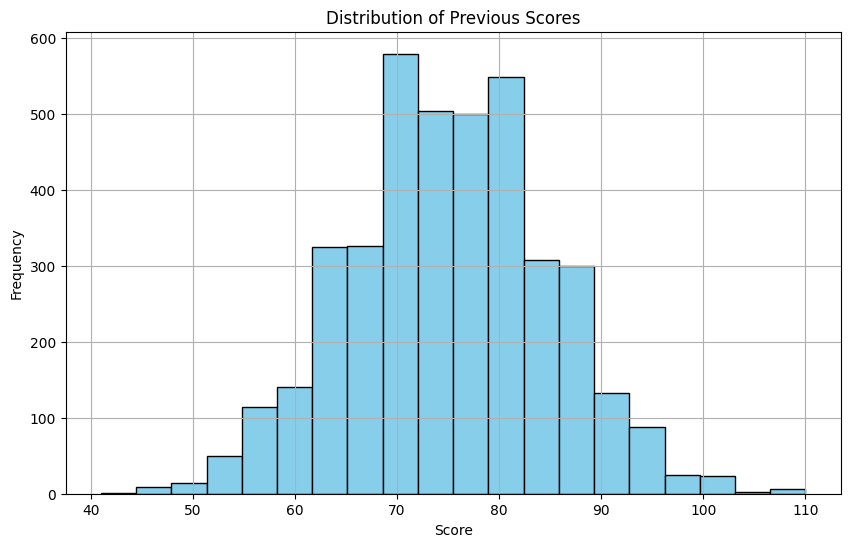

In [31]:
#We have successfully cleaned the dataset
#Now we can proceed with exploratory data analysis...
# Histogram of Previous Scores
plt.figure(figsize=(10, 6))
plt.hist(df4['Previous Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Previous Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [33]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------------------------- ------------- 194.6/294.9 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import seaborn as sns

C:\Users\DEVA HARSHA SAI N\AppData\Local\Temp\ipykernel_3332\3119170696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subject Importance', data=df4, palette='viridis')


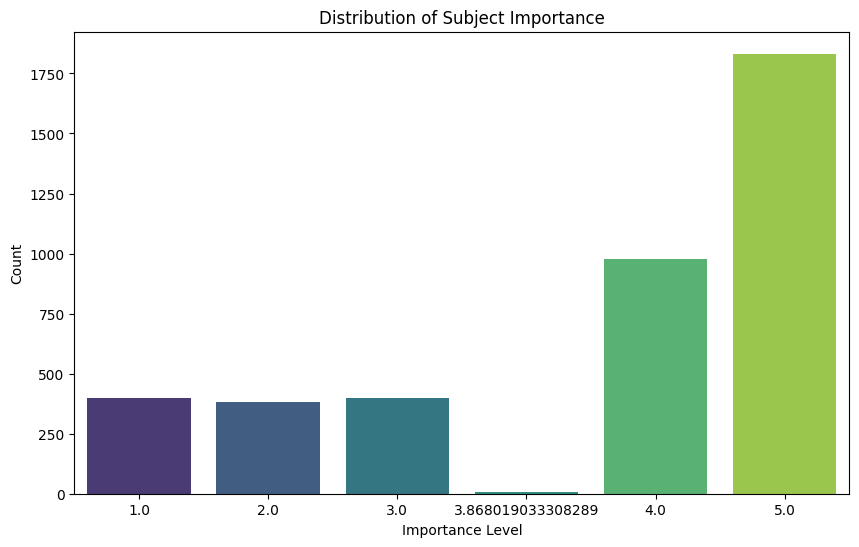

In [39]:
# Bar plot of Subject Importance
plt.figure(figsize=(10, 6))
sns.countplot(x='Subject Importance', data=df4, palette='viridis')
plt.title('Distribution of Subject Importance')
plt.xlabel('Importance Level')
plt.ylabel('Count')
plt.show()

C:\Users\DEVA HARSHA SAI N\AppData\Local\Temp\ipykernel_3332\2620188499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Subject', y='Time Left', data=df4, palette='Set3')


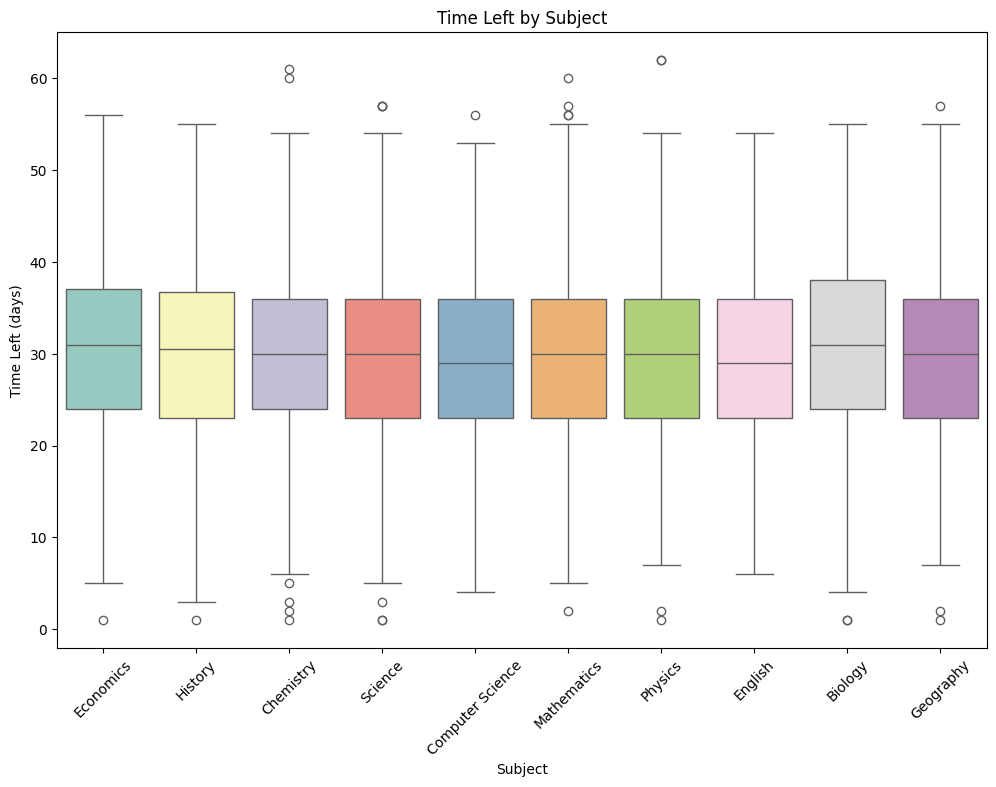

In [40]:
# Boxplot of Time Left by Subject
plt.figure(figsize=(12, 8))
sns.boxplot(x='Subject', y='Time Left', data=df4, palette='Set3')
plt.title('Time Left by Subject')
plt.xlabel('Subject')
plt.ylabel('Time Left (days)')
plt.xticks(rotation=45)
plt.show()

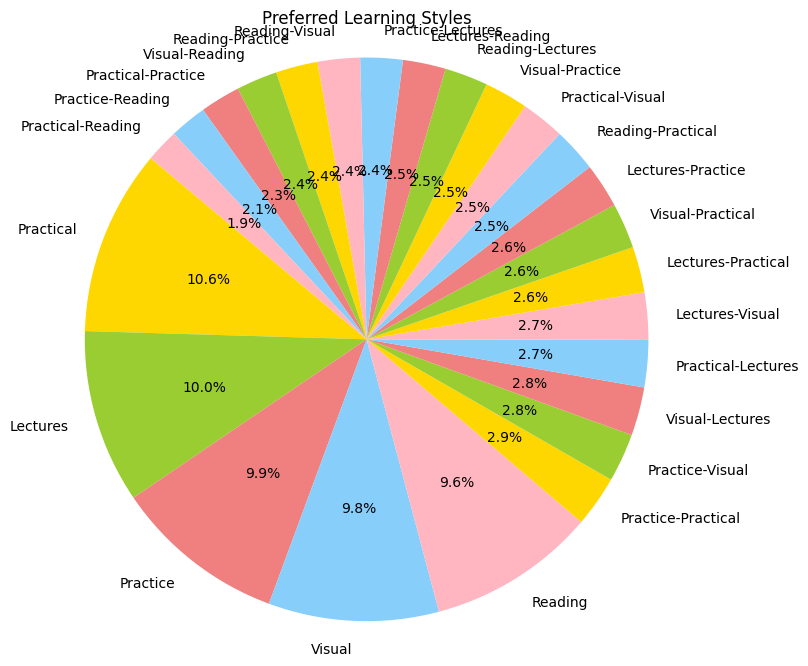

In [41]:
# Pie chart of Preferred Learning Styles
style_counts = df4['Preferred Learning Style'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Preferred Learning Styles')
plt.axis('equal')
plt.show()

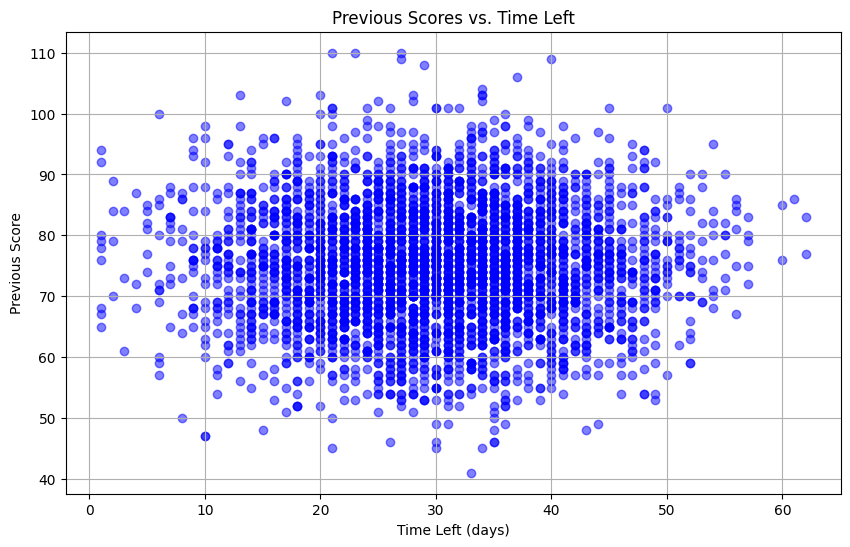

In [42]:
# Scatter plot of Previous Scores vs. Time Left
plt.figure(figsize=(10, 6))
plt.scatter(df4['Time Left'], df4['Previous Score'], color='blue', alpha=0.5)
plt.title('Previous Scores vs. Time Left')
plt.xlabel('Time Left (days)')
plt.ylabel('Previous Score')
plt.grid(True)
plt.show()

Data Segregation

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
# Encode categorical data
label_encoder = LabelEncoder()
df4['Preferred Learning Style'] = label_encoder.fit_transform(df4['Preferred Learning Style'])

# Split the data into features and target variable
X = df4[['Student ID', 'Subject', 'Previous Score', 'Time Left', 'Subject Importance']]
y = df4['Preferred Learning Style']

# Encode categorical features
X = pd.get_dummies(X, columns=['Subject'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

Decision Tree Accuracy: 0.05131414267834793
                    precision    recall  f1-score   support

          Lectures       0.07      0.08      0.07        79
Lectures-Practical       0.06      0.05      0.05        21
 Lectures-Practice       0.00      0.00      0.00        25
  Lectures-Reading       0.04      0.07      0.05        15
   Lectures-Visual       0.00      0.00      0.00        24
         Practical       0.05      0.06      0.06        83
Practical-Lectures       0.00      0.00      0.00        24
Practical-Practice       0.04      0.05      0.05        19
 Practical-Reading       0.00      0.00      0.00        15
  Practical-Visual       0.00      0.00      0.00        18
          Practice       0.05      0.05      0.05        79
 Practice-Lectures       0.00      0.00      0.00        19
Practice-Practical       0.00      0.00      0.00        20
  Practice-Reading       0.00      0.00      0.00        13
   Practice-Visual       0.05      0.05      0.05      

In [47]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB 2.9 MB/s eta 0:00:43
   ---------------------------------------- 0.7/124.9 MB 5.9 MB/s eta 0:00:22
   ---------------------------------------- 0.9/124.9 MB 6.6 MB/s eta 0:00:19
   ---------------------------------------- 1.2/124.9 MB 6.1 MB/s eta 0:00:21
    --------------------------------------- 1.7/124.9 MB 6.6 MB/s eta 0:00:19
    --------------------------------------- 2.0/124.9 MB 6.7 MB/s eta 0:00:19
    --------------------------------------- 2.3/124.9 MB 6.8 MB/s eta 0:00:19
    --------------------------------------- 2.7/124.9 MB 6.8 MB/s eta 0:00:18
    --------------------------------------- 3.0/124.9 MB 6.8 MB/s eta 0:00:18
   - -------------------------------------- 3.3/124.9 MB 6.9 MB/s eta 0:00:18
   - -------------------------------------- 3.7/124.9 MB 6.9 MB/s eta 0:00:18



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


C:\Users\DEVA HARSHA SAI N\anaconda3\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.07509386733416772
                    precision    recall  f1-score   support

          Lectures       0.08      0.11      0.09        79
Lectures-Practical       0.00      0.00      0.00        21
 Lectures-Practice       0.00      0.00      0.00        25
  Lectures-Reading       0.08      0.07      0.07        15
   Lectures-Visual       0.11      0.04      0.06        24
         Practical       0.08      0.13      0.10        83
Practical-Lectures       0.12      0.04      0.06        24
Practical-Practice       0.07      0.05      0.06        19
 Practical-Reading       0.00      0.00      0.00        15
  Practical-Visual       0.00      0.00      0.00        18
          Practice       0.10      0.13      0.11        79
 Practice-Lectures       0.14      0.11      0.12        19
Practice-Practical       0.00      0.00      0.00        20
  Practice-Reading       0.00      0.00      0.00        13
   Practice-Visual       0.00      0.00      0.00        19
 

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.056320400500625784
                    precision    recall  f1-score   support

          Lectures       0.11      0.14      0.12        79
Lectures-Practical       0.00      0.00      0.00        21
 Lectures-Practice       0.00      0.00      0.00        25
  Lectures-Reading       0.00      0.00      0.00        15
   Lectures-Visual       0.00      0.00      0.00        24
         Practical       0.10      0.14      0.12        83
Practical-Lectures       0.08      0.04      0.06        24
Practical-Practice       0.00      0.00      0.00        19
 Practical-Reading       0.00      0.00      0.00        15
  Practical-Visual       0.00      0.00      0.00        18
          Practice       0.08      0.10      0.09        79
 Practice-Lectures       0.09      0.05      0.07        19
Practice-Practical       0.00      0.00      0.00        20
  Practice-Reading       0.00      0.00      0.00        13
   Practice-Visual       0.00      0.00      0.00        19
        

In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset (assuming the cleaned dataset is available)
df = pd.read_csv('student_learning_data_cleaned.csv')

# Preprocess the data
# Encode categorical features
label_encoder_subject = LabelEncoder()
df['Subject'] = label_encoder_subject.fit_transform(df['Subject'])

label_encoder_learning_style = LabelEncoder()
df['Preferred Learning Style'] = label_encoder_learning_style.fit_transform(df['Preferred Learning Style'])

# Define feature columns and target column
feature_columns = ['Student ID', 'Subject', 'Previous Score', 'Time Left', 'Subject Importance']
target_column = 'Preferred Learning Style'

# Split the data into features and target
X = df[feature_columns]
y = df[target_column]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred, target_names=label_encoder_learning_style.classes_))

Accuracy: 0.09125
                    precision    recall  f1-score   support

          Lectures       0.15      0.27      0.19        73
Lectures-Practical       0.00      0.00      0.00        19
 Lectures-Practice       0.00      0.00      0.00        22
  Lectures-Reading       0.00      0.00      0.00        16
   Lectures-Visual       0.00      0.00      0.00        21
         Practical       0.11      0.14      0.12        94
Practical-Lectures       0.08      0.03      0.05        29
Practical-Practice       0.00      0.00      0.00        22
 Practical-Reading       0.00      0.00      0.00        15
  Practical-Visual       0.00      0.00      0.00        16
          Practice       0.09      0.10      0.10        89
 Practice-Lectures       0.07      0.05      0.06        20
Practice-Practical       0.07      0.06      0.06        17
  Practice-Reading       0.00      0.00      0.00        12
   Practice-Visual       0.00      0.00      0.00        23
           Reading   

In [62]:
import pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('label_encoder_subject.pkl', 'wb') as f:
    pickle.dump(label_encoder_subject, f)

with open('label_encoder_learning_style.pkl', 'wb') as f:
    pickle.dump(label_encoder_learning_style, f)

print("Model and encoders have been saved.")

Model and encoders have been saved.


In [60]:
def predict_learning_style(student_id, subject, previous_score, time_left, subject_importance):
    # Encode the subject using the fitted label encoder
    encoded_subject = label_encoder_subject.transform([subject])[0]

    # Create a DataFrame for the custom input
    custom_input = pd.DataFrame({
        'Student ID': [student_id],
        'Subject': [encoded_subject],
        'Previous Score': [previous_score],
        'Time Left': [time_left],
        'Subject Importance': [subject_importance]
    })

    # Predict the learning pattern using the trained model
    prediction = rf_model.predict(custom_input)
    
    # Decode the predicted learning style
    predicted_learning_style = label_encoder_learning_style.inverse_transform(prediction)[0]
    
    return predicted_learning_style

# Example usage
student_id = int(input("Enter your ID"))
subject = input("Please enter the name of subject")
previous_score = int(input("Please enter your previous score"))
time_left = int(input("Please enter the time left"))
subject_importance = int(input("Please rate the importance of this subject on a scale of 1 to 5"))

predicted_style = predict_learning_style(student_id, subject, previous_score, time_left, subject_importance)
print(f"Predicted Learning Style: {predicted_style}")

Enter your ID 101
Please enter the name of subject English
Please enter your previous score 90
Please enter the time left 10
Please rate the importance of this subject on a scale of 1 to 5 3


Predicted Learning Style: Visual


In [63]:
pip install virtualenv

   ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
   - -------------------------------------- 0.2/5.7 MB 2.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.5/5.7 MB 4.9 MB/s eta 0:00:02
   ------ --------------------------------- 0.9/5.7 MB 5.7 MB/s eta 0:00:01
   -------- ------------------------------- 1.3/5.7 MB 6.2 MB/s eta 0:00:01
   ---------- ----------------------------- 1.5/5.7 MB 6.1 MB/s eta 0:00:01
   ------------- -------------------------- 1.9/5.7 MB 6.3 MB/s eta 0:00:01
   ---------------- ----------------------- 2.3/5.7 MB 6.6 MB/s eta 0:00:01
   ------------------ --------------------- 2.6/5.7 MB 6.7 MB/s eta 0:00:01
   -------------------- ------------------- 3.0/5.7 MB 6.8 MB/s eta 0:00:01
   ----------------------- ---------------- 3.3/5.7 MB 6.8 MB/s eta 0:00:01
   ------------------------- -------------- 3.6/5.7 MB 6.8 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
